# To predict diabetes using PIMA diabetes data

### Importing libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Load and review data

In [5]:
data = pd.read_csv("./data/pima-data.csv")

In [6]:
data.shape

(768, 10)

In [7]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [8]:
data.isnull().values.any()

False

In [9]:
def plot_correlated(data, size=11):
    """
    Function to show plot of correlation between the data columns
    data : the data from pandas Dataframe
    size : the horizontal and vertical size of the plot
    
    Result : blue - cyan - yellow - red -darkred = less to more correlated columns = 0 ---- 1 
    """
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

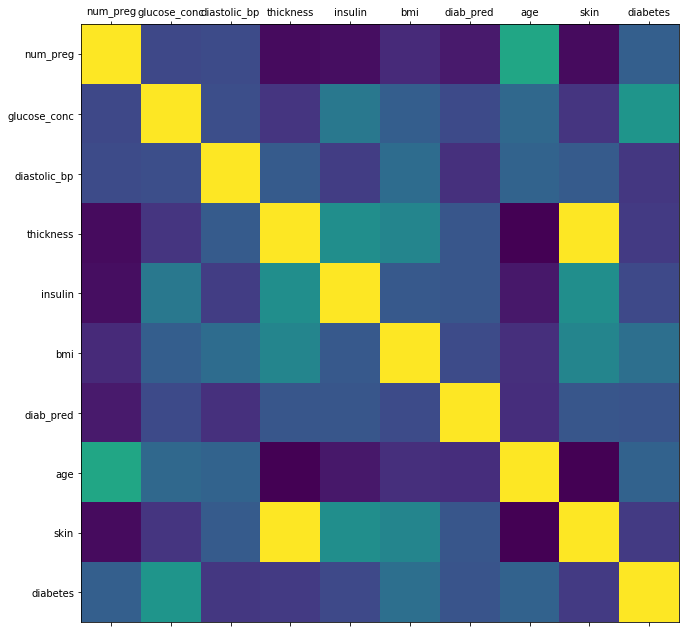

In [10]:
plot_correlated(data)

In [11]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [14]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


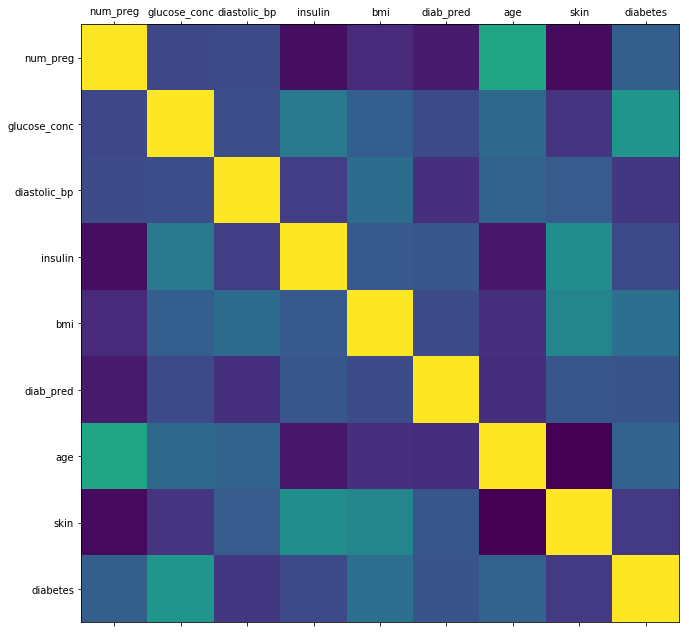

In [15]:
plot_correlated(data)

### Uniformying the data types of the features

In [16]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


Changing the diabetes column data from boolean to number

In [18]:
diabetes_map = {True: 1, False: 0}

In [19]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [20]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


In [21]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])

In [22]:
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [23]:
print("Diabetes - True : ", diabetes_true_count)
print("Diabetes - False : ", diabetes_false_count)

Diabetes - True :  268
Diabetes - False :  500


In [24]:
print("Diabetes - True : ", diabetes_true_count/data.shape[0]*100)
print("Diabetes - False : ", diabetes_false_count/data.shape[0]*100)

Diabetes - True :  34.89583333333333
Diabetes - False :  65.10416666666666


### Splitting the data
70% for training and 30% for testing

In [25]:
from sklearn.cross_validation import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

X = data[feature_columns].values
y = data[predicted_class].values

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=10)

c:\users\nithe\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Checking the size of the test and train splits

In [26]:
X_train.shape[0]/X.shape[0] * 100



69.921875

In [27]:
X_test.shape[0]/X.shape[0] * 100

30.078125

Verifying if the prediction are splitted uniformly

In [28]:
print(len(data.loc[data['diabetes'] == 1]) / len(data.loc[data['diabetes']]) * 100)
print(len(data.loc[data['diabetes'] == 0]) / len(data.loc[data['diabetes']]) * 100)

34.89583333333333
65.10416666666666


In [29]:
print(len(y_train[y_train[:] == 1]) / len(y_train[y_train[:]]) * 100)
print(len(y_train[y_train[:] == 0]) / len(y_train[y_train[:]]) * 100)

33.70577281191806
66.29422718808193


In [30]:
print(len(y_test[y_test[:] == 1]) / len(y_test[y_test[:]]) * 100)
print(len(y_test[y_test[:] == 0]) / len(y_test[y_test[:]]) * 100)

37.66233766233766
62.33766233766234


### Post split data preparation

#### hidden missing values

In [31]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


Check how many other missing(zero) values are there...

In [32]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [33]:
from sklearn.preprocessing import Imputer

fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

# Training with Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

## Performance on training data

In [35]:
naive_predict_train_data = naive_model.predict(X_train)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_train, naive_predict_train_data)))

Accuracy = 0.756


## Performance on test data

In [36]:
naive_predict_test_data = naive_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, naive_predict_test_data)))

Accuracy = 0.732


#### Looking into more details

In [37]:
print("Confusion matrix")

print("{0}".format(metrics.confusion_matrix(y_test, naive_predict_test_data, labels=[1,0])))

print("Classification report")

print("{0}".format(metrics.classification_report(y_test, naive_predict_test_data, labels=[1,0])))


Confusion matrix
[[ 47  40]
 [ 22 122]]
Classification report
             precision    recall  f1-score   support

          1       0.68      0.54      0.60        87
          0       0.75      0.85      0.80       144

avg / total       0.73      0.73      0.72       231



# Random Forest



In [38]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

#### Predicting Training data

In [39]:
rf_predict_train_data = random_forest_model.predict(X_train)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_train, rf_predict_train_data)))

Accuracy = 0.987


#### Predicting Test data

In [40]:
rf_predict_test_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, rf_predict_test_data)))

Accuracy = 0.719


#### Looking into more details

In [41]:
print("Confusion matrix")

print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test_data, labels=[1,0])))

print("Classification report")

print("{0}".format(metrics.classification_report(y_test, rf_predict_test_data, labels=[1,0])))

Confusion matrix
[[ 41  46]
 [ 19 125]]
Classification report
             precision    recall  f1-score   support

          1       0.68      0.47      0.56        87
          0       0.73      0.87      0.79       144

avg / total       0.71      0.72      0.70       231



# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(C=0.7, random_state=10)

log_reg_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicting with train data

In [43]:
lr_predict_train_data = log_reg_model.predict(X_train)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_train, lr_predict_train_data)))

Accuracy = 0.778


#### Predicting with test data

In [44]:
lr_predict_test_data = log_reg_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, lr_predict_test_data)))

Accuracy = 0.727


#### looking into more details

In [45]:
print("Confusion matrix")

print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test_data, labels=[1,0])))

print("Classification report")

print("{0}".format(metrics.classification_report(y_test, lr_predict_test_data, labels=[1,0])))

Confusion matrix
[[ 39  48]
 [ 15 129]]
Classification report
             precision    recall  f1-score   support

          1       0.72      0.45      0.55        87
          0       0.73      0.90      0.80       144

avg / total       0.73      0.73      0.71       231



##### Selecting regularization parameter for logistic regression

First max value of 0.494 occured at 2.900


Text(0,0.5,'recall_score')

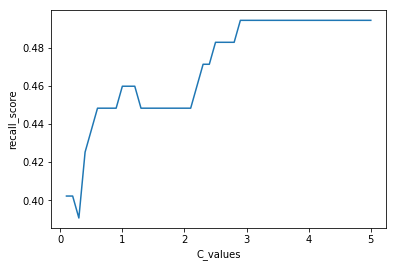

In [46]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, random_state=10)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall):
        best_recall = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val += C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall)]
print("First max value of {0:.3f} occured at {1:.3f}".format(best_recall, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C_values")
plt.ylabel("recall_score")


# Logistic Regression with class_weight='balanced'

First max value of 0.747 occured at 0.500


Text(0,0.5,'recall_score')

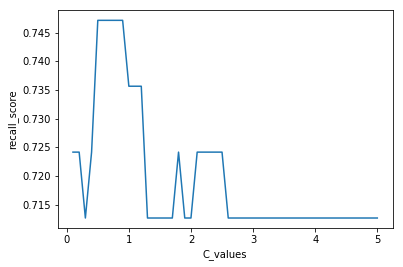

In [47]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight="balanced", random_state=10)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall):
        best_recall = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val += C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall)]
print("First max value of {0:.3f} occured at {1:.3f}".format(best_recall, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C_values")
plt.ylabel("recall_score")


In [48]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(C=0.7, class_weight="balanced", random_state=10)

log_reg_model.fit(X_train, y_train.ravel())

lr_predict_test_data = log_reg_model.predict(X_test)

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, lr_predict_test_data)))

print("Confusion matrix")

print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test_data, labels=[1,0])))

print("Classification report")

print("{0}".format(metrics.classification_report(y_test, lr_predict_test_data, labels=[1,0])))

Accuracy = 0.762
Confusion matrix
[[ 65  22]
 [ 33 111]]
Classification report
             precision    recall  f1-score   support

          1       0.66      0.75      0.70        87
          0       0.83      0.77      0.80       144

avg / total       0.77      0.76      0.76       231



# LogisticRegressionCV

In [49]:
from sklearn.linear_model import LogisticRegressionCV
lrcv_model = LogisticRegressionCV(n_jobs=-1, random_state=10, Cs=3, cv=10, refit=True, class_weight="balanced")
lrcv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=10,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

#### Predicting with test data


In [50]:
lrcv_predict_test_data = lrcv_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, lrcv_predict_test_data)))

print("Confusion matrix")

print("{0}".format(metrics.confusion_matrix(y_test, lrcv_predict_test_data, labels=[1,0])))

print("Classification report")

print("{0}".format(metrics.classification_report(y_test, lrcv_predict_test_data, labels=[1,0])))

Accuracy = 0.740
Confusion matrix
[[ 54  33]
 [ 27 117]]
Classification report
             precision    recall  f1-score   support

          1       0.67      0.62      0.64        87
          0       0.78      0.81      0.80       144

avg / total       0.74      0.74      0.74       231

